         X1        X2    y
0  2.515463  1.991283  1.0
1  0.447593  0.559807  1.0
2  0.749229 -0.433780  0.0
3 -0.289287  1.536832  1.0
4  3.675082  2.146912  1.0
5  0.330916 -0.805452  0.0
6 -0.216534  0.537025  1.0
7  0.502796  1.212771  1.0
8  0.987726 -0.072112  0.0
9 -0.816185  0.357660  0.0
         X1        X2    y
0  0.150792  0.131491  1.0
1  1.637961  0.865304  1.0
2  2.489981 -0.399073  1.0
3  3.162354  0.131336  1.0
4  0.267035 -0.319733  0.0
5  2.846505  1.351345  1.0
6  0.744497 -0.500665  1.0
7  1.749412  1.357404  1.0
8 -1.618526 -0.767160  0.0
9  1.180216  0.565855  1.0
K: 1, P: 1, Accuracy: 70.625%
K: 1, P: 2, Accuracy: 70.625%
K: 1, P: 3, Accuracy: 70.625%
K: 1, P: 4, Accuracy: 71.04166666666667%
K: 1, P: 5, Accuracy: 70.83333333333334%
K: 2, P: 1, Accuracy: 73.54166666666667%
K: 2, P: 2, Accuracy: 72.70833333333333%
K: 2, P: 3, Accuracy: 71.875%
K: 2, P: 4, Accuracy: 71.66666666666667%
K: 2, P: 5, Accuracy: 72.08333333333333%
K: 3, P: 1, Accuracy: 76.25%
K: 3, P: 2,

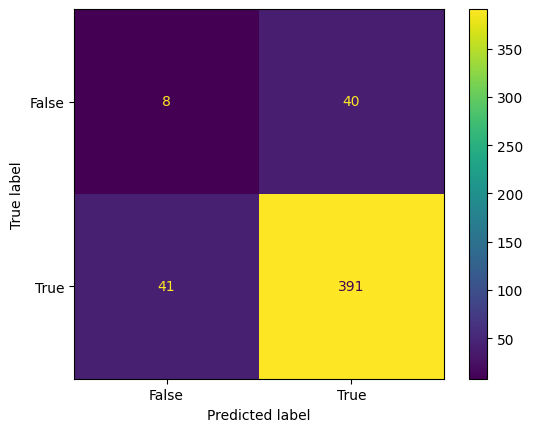

In [44]:

from scipy.spatial import distance_matrix
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

import math
class KNN:
    '''
    k nearest neighboors algorithm class
    __init__() initialize the model
    train() trains the model
    predict() predict the class for a new point
    '''

    def __init__(self, k,p):
        '''
        INPUT :
        - k : is a natural number bigger than 0
        '''

        if k <= 0:
            raise Exception("Sorry, no numbers below or equal to zero. Start again!")

        # empty initialization of X and y
        self.X = []
        self.y = []
        # k is the parameter of the algorithm representing the number of neighborhoods
        self.k = k
        self.p=p

    def train(self,X,y):
        '''
        INPUT :
        - X : is a 2D NxD numpy array containing the coordinates of points
        - y : is a 1D Nx1 numpy array containing the labels for the corrisponding row of X
        '''
        self.X=X
        self.y=y
        return

    def predict(self,X_new):
        '''
        INPUT :
        - X_new : is a MxD numpy array containing the coordinates of new points whose label has to be predicted
        A
        OUTPUT :
        - y_hat : is a Mx1 numpy array containing the predicted labels for the X_new points
        '''
        dist_matrix=self.minkowski_dist(X_new)
        indeces=np.argsort(dist_matrix)[:,:self.k] #we get the indices of the k nearest points
        classes=self.y[indeces] #we get the classes of the k nearest points
        classes=np.reshape(classes, (classes.shape[0], classes.shape[1])).astype(int)
        y_hat=[]

        for row in classes:

            counts=np.bincount(row) #maybe add weights here, maybe also do it without the loop
           #print(f"counts{counts}")
            maxclass=counts.argmax()
            y_hat.append(maxclass)

        return y_hat

    def minkowski_dist(self,X_new):
        '''
        INPUT :
        - X_new : is a MxD numpy array containing the coordinates of points for which the distance to the training set X will be estimated
        - p : parameter of the Minkowski distance

        OUTPUT :
        - dst : is an MxN numpy array containing the distance of each point in X_new to X
        '''
        # first=True

        # for x in X_new:

        #     dist=np.sum(abs(x-self.X)**self.p, axis=1)**(1/self.p)


        #     if first:
        #         dist_matrix=dist
        #         first=False

        #     else:
        #         dist_matrix=np.vstack((dist_matrix,dist))


        # --------

        abs_diff = np.abs(X_new[:, np.newaxis] - self.X)
        powered_diff = np.power(abs_diff, self.p)
        summed_diff = np.sum(powered_diff, axis=2)
        dist_matrix = np.power(summed_diff, 1 / self.p)


        return dist_matrix

        # ------

        # dst = distance_matrix(X_new, self.X, p=p)
        # return dst

def main():
    import pandas as pd
    data=pd.read_csv("training.csv",sep=',')
    print(data.head(10))
    training_data=np.array(data[['X1','X2']])
    training_y=np.array(data[['y']])
    validation=pd.read_csv("validation.csv")
    print(validation.head(10))
    val_data=np.array(validation[['X1','X2']])
    val_y=np.array(validation[['y']])


    acc_b = 0.0
    k_b = 0
    p_b = 0

    for k in range(1, 31):
        for p in range(1, 6):
            knn = KNN(k, p)
            knn.train(training_data, training_y)
            y_hat = np.array(knn.predict(val_data)).astype(int)
            val_y = np.reshape(val_y, (val_y.shape[0]))

            acc_loop = metrics.accuracy_score(val_y, y_hat)

            if acc_loop > acc_b:
                acc_b = acc_loop
                k_b = k
                p_b = p

            print(f"K: {k}, P: {p}, Accuracy: {acc_loop * 100}%")

    print(f"Best K: {k_b}, Best P: {p_b}, Best Accuracy: {acc_b * 100}%")





    k=23
    p=5
    knn=KNN(k,p)

    knn.train(training_data, training_y)


    y_hat=np.array(knn.predict(val_data)).astype(int)
    val_y=np.reshape(val_y,(val_y.shape[0]))
    print(y_hat.shape)
    print(val_y.shape)
    error=np.sum(abs(y_hat-val_y))
    MSE = (error**2)/len(y_hat)


    print(f"the error is: {error} out of {len(y_hat)}")
    print(f"the Mean Squared Error is: {MSE/len(y_hat)*100}%")
    # Accuracy
    Accuracy = metrics.accuracy_score(val_y, y_hat)
    print(f"The Accuracy is: {Accuracy*100}%")
    #Precision
    Precision = metrics.precision_score(val_y,y_hat)
    print(f"The Precision is: {Precision*100}%")
    #F1-Score
    F1_score = metrics.f1_score(val_y, y_hat)
    print(f"The F1-Score is: {F1_score*100}%")

    #Sensitivity(Recall)
    Sensitivity_recall = metrics.recall_score(val_y, y_hat)
    print(f"The Sensitivity is: {Sensitivity_recall*100}%")

    val_y = np.random.binomial(1,.9,size = 480)
    y_hat = np.random.binomial(1,.9,size = 480)

    confusion_matrix = metrics.confusion_matrix(val_y, y_hat)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    print("Confusion Matrix")
    cm_display.plot()
    plt.show()


main()